# Uvod

Carvana je online prodavnica polovnih automobila koja svoju ponudu bazira na vozilima kupljenim putem aukcija. Kao i svaka prodavnica polovnih automobila, Carvana nastoji da kupi što više automobila u najboljem mogućem stanju kako bi ih kasnije lakše prodala. Najveći rizik u ovom poslovanju predstavlja kupovina polovnog automobila koji naizgled nema nikakvih kvarova, a kasnije se ispostavi da je neispravan, što ga čini nepogodnim za dalju prodaju.

Kako bi umanjila ovaj rizik, Carvana može koristiti model za predviđanje ispravnosti automobila baziran na svojoj bazi podataka. Na ovaj način, Carvana može svojim kupcima pružiti najbolji mogući izbor vozila. Cilj ovog projekta je kreiranje modela predviđanja koji će pomoći Carvani pri kupovini polovnih automobila na aukcijama. Ovaj model bi trebao minimizirati rizik od kupovine neispravnih automobila, kao i preventivno delovati na smanjenje dodatnih troškova.

# Opis problema

Jedan od problema u poslovanju može biti kupovina automobila koji na prvi pogled izgleda ispravno, ali detaljnijim pregledom se mogu otkriti problemi koji sprečavaju dalju prodaju. Takvi automobili, koji ne mogu biti prodati, predstavljaju gubitak za firmu.

Da bi smanjila mogućnost kupovine neispravnih automobila, Carvana može koristiti modele za predviđanje. Ovi modeli bi služili Carvani da utvrdi da li je automobil koji je nabavljen "limun" ili "breskva". Takođe, modeli bi pomogli Carvani da sastavi što bolju ponudu za svoje kupce, čime bi poboljšali reputaciju firme.


# Izazovi u rešavanju

Izazovi u rešavanju ovog problema jesu sledeći:

1.Postoje nedostajući podaci koji uklanjanjem/popunjavanjem mogu da iskrive sliku

2.Identifikacija problema - dok se ne upoznamo sa podacima možemo poći sa pogrešnom premisom da se izlazni atribut odnosi na krajnju kupovinu kupaca, a ne od Carvane

3.Podaci moraju da se srede pre primene algoritama

4.Rezonovanje dobijenih rezultata

5.Tačnost podataka

# Zašto je bitan?

Rešavanje ovog problema je bitno Carvani da bi minimizirala rizik od kupovine loših automobila koje kasnije ne može da proda, a samim tim i da smanji rizik od nepotrebnih gubitaka.

# Kome je bitan?

Rešavanje ovog problema je od ključne važnosti za kompaniju Carvana. Prvo, bitno je da Carvana ne kupuje automobile koji se kasnije ne mogu prodati, jer bi to predstavljalo čist gubitak za kompaniju. Drugo, kompanija koja kupuje uglavnom ispravne automobile uživa bolju reputaciju kod kupaca.

S druge strane, rešavanje ovog problema je važno i za same kupce, jer bi im omogućilo siguran način za kupovinu polovnih automobila. Na taj način, kupci bi imali veću sigurnost i poverenje prilikom kupovine vozila od Carvane.

# Opis atributa

Glavni problem koji treba rešiti jeste predviđanje da li je kupljeni automobil dobar ili loš. Dataset ima nedostajuće podatke, zavisna varijabla je binarnog tipa i dataset je još na početku odvojen u test i trening skup u razmeri 40:60 respektivno. U datasetu postoje 32 nezavisne varijable.

Naziv atributa

RefID - Jedinstven broj dodeljen vozilima

IsBadBuy - Identifikuje da li je mogla da se izbegne kupovina loseg vozila

PurchDate - Datum kupovine vozila na aukciji

Auction - Na kojoj aukciji je kupljeno vozilo

VehYear - Godina proizvodnje vozila

VehicleAge - Starost vozila

Make - Brend vozila

Model - Model vozila

Trim - Nivo dodatne opreme vozila

SubModel - Podmodel vozila

Color - Boja vozila

Transmission - Tip menjaca vozila (Automatic, Manuelni)

WheelTypeID - ID tipa guma vozila

WheelType - Tip guma vozila (Alloy, Covers)

VehOdo - Citac odometra na vozilu

Nationality - Zemlja proizvodnje

Size - Velicina kategorije vozila (Compact, SUV, etc)

TopThreeAmericanName - Identifikuje da li je proizvodjac jedan od tri najpoznatijih americkih proizvodjaca

MMRAcquisitionAuctionAveragePrice - Cena akvizicije vozila u prosecnom stanju u vremenu kupovine

MMRAcquisitionAuctionCleanPrice - Cena akvizicije vozila u iznad prosecnom stanju u vremenu kupovine

MMRAcquisitionRetailAveragePrice - Cena akvizije za vozilo u maloprodaji u prosecnom stanju u vremenu kupovine

MMRAcquisitonRetailCleanPrice - Cena akvizicije za vozilo u maloprodaji u iznad prosecnom stanju u vremenu kupovine

MMRCurrentAuctionAveragePrice - Cena akvizicije vozila u prosecnom stanju na danasnji dan

MMRCurrentAuctionCleanPrice - Cena akvizicije vozila u iznad prosecnom stanju na danasnji dan

MMRCurrentRetailAveragePrice - Cena akvizije za vozilo u maloprodaji u prosecnom stanju na danasnji dan

MMRCurrentRetailCleanPrice - Cena akvizije za vozilo u maloprodaji u iznad prosecnom stanju na danasnji dan

PRIMEUNIT - Identifikuje da li je vozilo imalo vecu traznju od standardne kupovine

AUCGUART - Nivo garancije obezbedjen od aukcije za vozilo (Zeleno, Zuto, Crveno)

BYRNO - Jedinstven broj dodeljen kupcu koji je kupio vozilo

VNZIP - Zipcode gde se auto nalazi w

VNST - Drzava u kojoj je kupljen automobil

VehBCost - Trosak akvizicije placen za vozilo u vremenu kupovine

IsOnlineSale - Identifikuje da li je vozilo kupljeno online

WarrantyCost - Cena garancije

# Opis cene grešaka

Odluka o tome koja greška je skuplja (FP, FN) zavisi od konkretnih posledica tih grešaka. Može varirati u zavisnosti od različitih faktora:

1. Ako je cena loše kupovine veća od cene propuštene kupovine, tada je FP skuplja greška jer bi pogrešno označene loše kupovine rezultirale u gubicima
2. Ako je loša kupovina povezana sa sigurnosnim rizicima, tada bi FN bio skuplji jer bi propuštanje takvih vozila kao loših moglo dovesti do rizika po sigurnost

## Učitavanje i upoznavanje podataka

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('training.csv') 

In [3]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [4]:
df.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

In [5]:
for column in df.columns:
    print(df[column].value_counts())  #Za svaku kolonu pokazujemo jedinstvene vrednosti

RefId
1        1
48678    1
48684    1
48683    1
48682    1
        ..
24351    1
24352    1
24353    1
24354    1
73014    1
Name: count, Length: 72983, dtype: int64
IsBadBuy
0    64007
1     8976
Name: count, dtype: int64
PurchDate
11/23/2010    384
2/25/2009     379
12/8/2010     372
10/13/2010    359
8/26/2009     359
             ... 
2/20/2010       2
5/25/2009       2
1/10/2010       1
12/4/2010       1
12/24/2010      1
Name: count, Length: 517, dtype: int64
Auction
MANHEIM    41043
OTHER      17501
ADESA      14439
Name: count, dtype: int64
VehYear
2006    17043
2005    15489
2007    11423
2004    10207
2008     6885
2003     6227
2002     3405
2001     1481
2009      822
2010        1
Name: count, dtype: int64
VehicleAge
4    17013
3    15902
5    12956
2     8482
6     8022
7     4646
1     3094
8     2220
9      646
0        2
Name: count, dtype: int64
Make
CHEVROLET       17248
DODGE           12912
FORD            11305
CHRYSLER         8844
PONTIAC          4258
KIA    

## Analiza podataka

Disbalans u izlaznoj promenljivoj:
Veliki broj instanci ima vrednost False.

Mesto kupovine:
Najviše automobila je kupljeno na aukciji u Manheim-u.
Skoro podjednako automobila je kupljeno u Adesi i na drugim mestima.

Godina proizvodnje:
Automobili su proizvedeni između 2001. i 2010. godine.
Najviše automobila je iz perioda 2004-2007.
Većina automobila je stara između tri i pet godina.

Proizvođači automobila:
Najviše su zastupljeni automobili brenda Chevrolet, zatim Dodge, Ford i Chrysler.

Modeli automobila:
Najviše su zastupljeni modeli: Pt Cruiser, Impala, Taurus, Caliber, Caravan Grand FWD V6.

Dodatna oprema:
Preovlađuje osnovni tip vozila.
Prisutan je i niz sportskih i luksuznih automobila (LS, SE, SXT, LT).

Tip vozila:
Najviše je zastupljen model 4D Sedan.

Boja automobila:
Najzastupljenije boje su srebrna, bela i plava.

Menjač:
Preovlađuje automatski menjač.

Tip volana:
Skoro podjednako su zastupljeni Alloy i Covers.
Special volani su manje dostupni.

Poreklo automobila:
Najviše su zastupljeni američki automobili srednje veličine.

Nedostajuće vrednosti:
Primeunit i Aucguart imaju dosta nedostajućih vrednosti i njih ćemo izbaciti.

Lokacija kupovine:
Najviše automobila se kupuje u Teksasu, Floridi i Karolini.
Najmanje se kupuje online, što predstavlja veliki disbalans.

In [6]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [7]:
df.describe(include=['object', 'bool'])

,PurchDate,Auction,Make,Model,Trim,SubModel,Color,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,VNST
count,72983,72983,72983,72983,70623,72975,72975,72974,69809,72978,72978,72978,3419,3419,72983
unique,517,3,33,1063,134,863,16,3,3,4,12,4,2,2,37
top,11/23/2010,MANHEIM,CHEVROLET,PT CRUISER,Bas,4D SEDAN,SILVER,AUTO,Alloy,AMERICAN,MEDIUM,GM,NO,GREEN,TX
freq,384,41043,17248,2329,13950,15236,14875,70398,36050,61028,30785,25314,3357,3340,13596


## NEDOSTAJUĆE VREDNOSTI 

In [8]:
df.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [9]:
df.shape

(72983, 34)

In [10]:
df = df.drop(['PRIMEUNIT', 'AUCGUART', 'RefId', 'WheelTypeID', 'VNZIP1'], axis=1)

In [11]:
df.shape

(72983, 29)

Zbog velikog broja nedostajucih vrednosti, dropovali smo kolone PRIMEUNIT i AUCGUART. ID vrednosti smo dropovali kao i zip code odakle je kupljen automobil. RefId je bio jedinstven za svaku instancu i nije bilo poente da ga koristimo za analizu. WheelTypeID smo dropovali jer vec imamo kolonu WheelType. Zip code nam nije bitan za analizu, svakako imamo kolonu iz koje drzave je kupljeno vozilo.

In [12]:
kolone = df.select_dtypes(include=['object']).columns
najcesce_vrednosti = df[kolone].mode().iloc[0]
df[kolone]=df[kolone].fillna(najcesce_vrednosti)

In [13]:
float_kolone = df.select_dtypes(include=['float64']).columns
medijane = df[float_kolone].median()
df[float_kolone] = df[float_kolone].fillna(medijane)

In [14]:
df.isna().sum()

IsBadBuy                             0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNST                     

Problem nedostajućih vrednosti smo kod podataka tipa object rešili ubacvianjem najčešćih vrednosti, a kod objekata tipa float smo rešili dodavanjem medijane.

## TRANSFORMACIJA I GRUPISANJE PODATAKA

In [15]:
df.dtypes

IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrentAuctionAveragePrice        float64
MMRCurrentAuctionCleanPrice          float64
MMRCurrent

In [16]:
df['PurchDate'] = pd.to_datetime(df['PurchDate'])

Transformišemo stringove koji predstavljaju datume u stvarne datum objekte, što olakšava analizu i obradu vremenskih podataka

In [17]:
df['Godina'] = df['PurchDate'].dt.year
df['Mesec'] = df['PurchDate'].dt.month
df['Kvartal'] = df['PurchDate'].dt.quarter

Ovim se omogućava da se datumi u DataFrame-u df koriste efikasnije za analizu po godinama, mesecima i kvartalima, što je često korisno za sezonsku analizu ili grupisanje podataka po vremenskim periodima.

In [18]:
group = df.groupby(['Godina', 'Mesec', 'Kvartal']).size().reset_index(name='Broj')

In [19]:
def mapiraj_na_region(skraćenica):
    severne_države = ['ME', 'NH', 'VT', 'NY', 'MA', 'RI', 'CT', 'NJ', 'PA']
    jugoistok_države = ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL']
    srednje_države = ['OH', 'IN', 'MI', 'IL', 'WI', 'MN', 'IA', 'MO']
    jugozapad_države = ['ND', 'SD', 'NE', 'KS', 'OK', 'TX']
    zapadne_države = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV']
    pacifičke_države = ['WA', 'OR', 'CA', 'HI', 'AK']

    if skraćenica in severne_države:
        return 'Sever'
    elif skraćenica in jugoistok_države:
        return 'Jugoistok'
    elif skraćenica in srednje_države:
        return 'Srednji deo'
    elif skraćenica in jugozapad_države:
        return 'Jugozapad'
    elif skraćenica in zapadne_države:
        return 'Zapad'
    elif skraćenica in pacifičke_države:
        return 'Pacifički region'
    else:
        return 'Nepoznat region'

Ova funkcija je jednostavan način da se skraćenice država SAD-a transformišu u razumljive geografske regione, što olakšava dalju analizu i interpretaciju podataka u odnosu na geografsku lokaciju.

In [20]:
df['Region'] = df['VNST'].apply(mapiraj_na_region)

Za svaki red kolone VNST odradicemo mapiraj na region

In [21]:
grupisani_podaci = df.groupby('Region').size().reset_index(name='Broj') 
#Grupise podatke po koloni region, racuna broj pojavljivanja za svaki region i rezultat vraca
#kao novi dataframe sa dve kolone region i broj
#Reset index imenuje novu kolonu i resetuje indeks

Pretvrara kategoricke u binarne numericke

In [22]:
Region = pd.get_dummies(df['Region'])
df = pd.concat([df, Region], axis=1)
#Promenljive za svaku jedinstvenu vrednost u koloni region i imaju binarne vrednosti 0 i 1
#Sve se to dodaje u prethodni dataframe

In [23]:
Auction = pd.get_dummies(df['Auction'])
df = pd.concat([df, Auction], axis=1)


In [24]:
Color = pd.get_dummies(df['Color'])
df = pd.concat([df, Color], axis = 1)

In [25]:
df['Transmission'].value_counts()

Transmission
AUTO      70407
MANUAL     2575
Manual        1
Name: count, dtype: int64

In [26]:
df['Transmission'] = df['Transmission'].replace('Manual', 'MANUAL')

In [27]:
Transmission = pd.get_dummies(df['Transmission']) # Transmission -Tip menjača
df = pd.concat([df, Transmission], axis = 1)

In [28]:
WheelType = pd.get_dummies(df['WheelType']) #WheelType -Tip guma vozila
df = pd.concat([df, WheelType], axis = 1)

In [29]:
Nationality = pd.get_dummies(df['Nationality']) #Nationality-Zemlja proizvodnje
df = pd.concat([df, Nationality], axis = 1)

In [30]:
Size = pd.get_dummies(df['Size']) #Size-Velicina kategorije vozila
df = pd.concat([df, Size], axis = 1)

In [31]:
Top = pd.get_dummies(df['TopThreeAmericanName']) # TopThreeAmericanName-Da li je proizvodjac jedan od tri najpoznatijih americkih proizvodjaca
df = pd.concat([df, Top], axis = 1)

In [32]:
Region = pd.get_dummies(df['Region'])
df = pd.concat([df, Region], axis = 1)

In [33]:
def mapiraj_trim_nivo(trim_nivo): #Trim- nivo dodatne opreme vozila
    kategorije = {
        'L': 'Luksuzni',
        'B': 'Osnovni',
        'S': 'Sportski',
        'T': 'Touring',
        'X': 'Extra',
        'E': 'Extra',
        'G': 'Grande',
        'C': 'Classic',
    }

    if trim_nivo[0] in kategorije:
        return kategorije[trim_nivo[0]]
    else:
        return 'Ostalo'

df['trim kategorija'] = df['Trim'].apply(mapiraj_trim_nivo)

grupisani_podaci = df.groupby('trim kategorija').size().reset_index(name='Broj')

In [34]:
trim = pd.get_dummies(df['trim kategorija'])
df = pd.concat([df, trim], axis=1)

In [35]:
def izdvoji_oznaku(submodel): #SubModel - Podmodel vozila
    oznaka = submodel.split()[0]  
    kategorije = {
        '4D': '4 vrata',
        '2D': '2 vrata',
        'EXT': 'Produžen',
        'MINIVAN': 'Minivan',
        'QUAD': 'Kvad',
        'REG': 'Regular Cab',
        'CREW': 'Crew Cab',
    }

    if oznaka in kategorije:
        return kategorije[oznaka]
    else:
        return 'Ostalo'

df['Karakteristike'] = df['SubModel'].apply(izdvoji_oznaku)

grupisani_podaci = df.groupby('Karakteristike').size().reset_index(name='Broj')


In [36]:
kategorije = pd.get_dummies(df['Karakteristike'])
df = pd.concat([df, kategorije], axis=1)

In [37]:
brend = pd.get_dummies(df['Make']) #Make - Brend vozila
df = pd.concat([df, brend], axis = 1)

In [38]:
def proveri_pogon(naziv):
    if '2WD' in naziv:
        return 'Pogon na dva tocka'
    elif 'FWD' in naziv:
        return 'Prednji pogon'
    elif 'RWD' in naziv:
        return 'Zadnji pogon'
    elif 'V6' in naziv:
        return 'Motor sa 6 cilindra'
    elif '6C' in naziv:
        return 'Motor sa 6 cilindra - 2WD'
    elif 'PICKUP' in naziv:
        return 'Pickup'
    elif '4C' in naziv:
        return 'Motor sa 4 cilindra - 2WD'
    elif 'V8' in naziv:
        return 'Motor sa 8 cilindra'
    else: 
        return 'Ostalo'

In [39]:
df['Modeli'] = df['Model'].apply(proveri_pogon)

In [40]:
grupisani_podaci = df.groupby('Model').size().reset_index(name='Broj')

In [41]:
modeli = pd.get_dummies(df['Modeli'])
df = pd.concat([df, modeli], axis=1)

In [42]:
df.shape

(72983, 152)

## VIZUELIZACIJE PRE NORMALIZACIJE

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

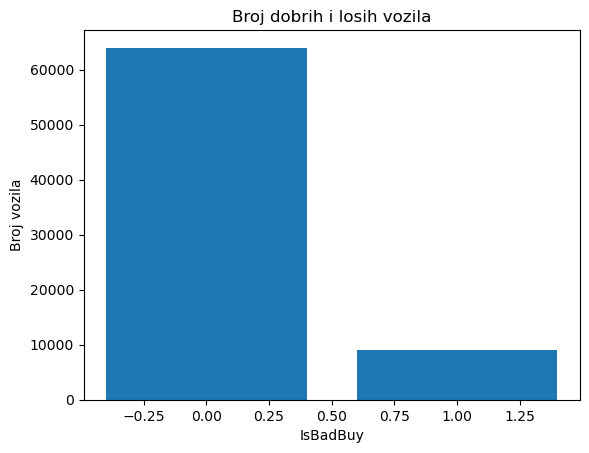

In [44]:
counts = df['IsBadBuy'].value_counts()

plt.bar(counts.index, counts)

plt.xlabel('IsBadBuy')
plt.ylabel('Broj vozila')
plt.title('Broj dobrih i losih vozila')

plt.show()

Kupljeno je preko 60 000 dobrih automobila i oko 10 000 losih automobila, što objašnjava veliki disbalans u izlaznoj promenljivoj.

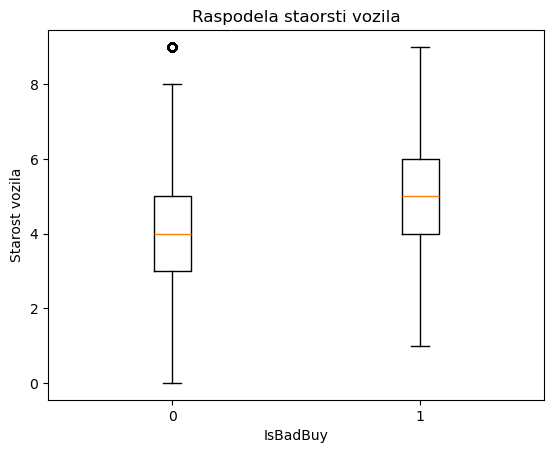

In [45]:
plt.boxplot([df[df['IsBadBuy'] == 0]['VehicleAge'], df[df['IsBadBuy'] == 1]['VehicleAge']], labels=['0', '1'])

plt.xlabel('IsBadBuy')
plt.ylabel('Starost vozila')
plt.title('Raspodela staorsti vozila')

plt.show()

Dobri automobili su mladji od losih.

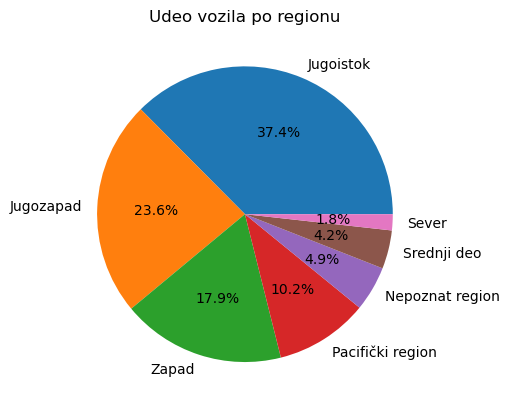

In [46]:
count = df['Region'].value_counts()

plt.pie(count, labels = count.index, autopct = '%1.1f%%')
plt.title('Udeo vozila po regionu')
plt.show()

Najviše automobila se kupuje na jugu zemlje

<BarContainer object of 2 artists>

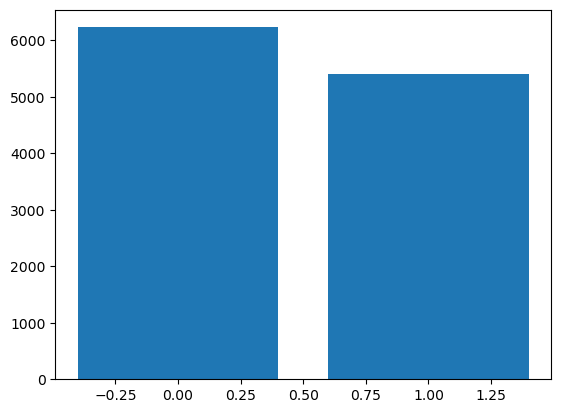

In [47]:
avg_prices = df.groupby('IsBadBuy')['MMRAcquisitionAuctionAveragePrice'].mean()
plt.bar(avg_prices.index, avg_prices)

Prosečna cena akvizicije za dobre automobile je viša od cene za loša vozila.

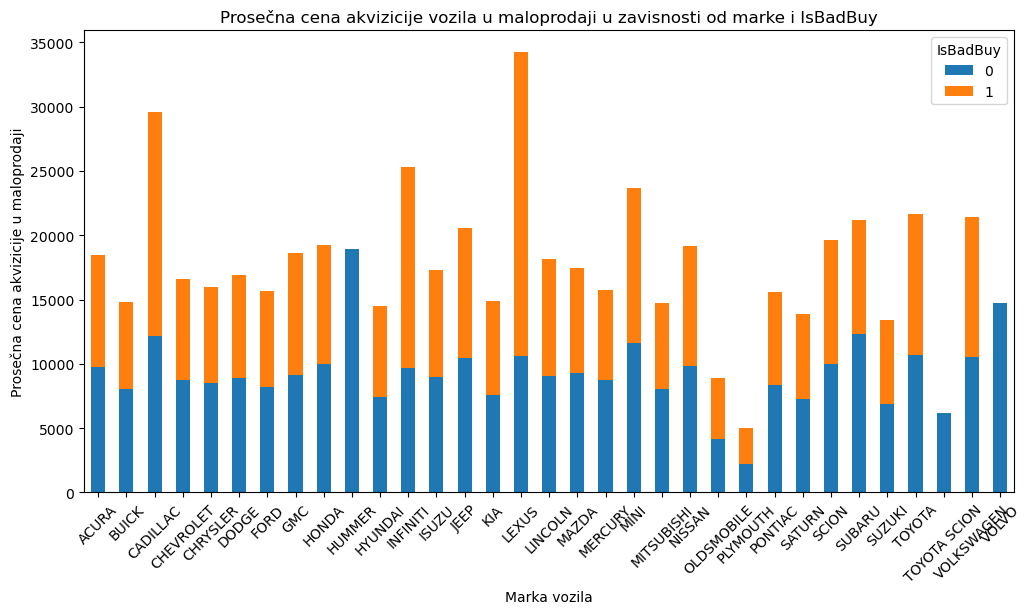

In [48]:
avg_prices = df.groupby(['Make', 'IsBadBuy'])['MMRAcquisitionRetailAveragePrice'].mean().unstack()

avg_prices.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Marka vozila')
plt.ylabel('Prosečna cena akvizicije u maloprodaji')
plt.title('Prosečna cena akvizicije vozila u maloprodaji u zavisnosti od marke i IsBadBuy')

plt.xticks(rotation=45)

plt.legend(title='IsBadBuy')
plt.show()

Hummer, Toyota i Volvo su vozila koja su uvek dobra. Lexus i Cadillac su vozila oko kojih bi trebalo obratiti pažnju prilikom kupovine.

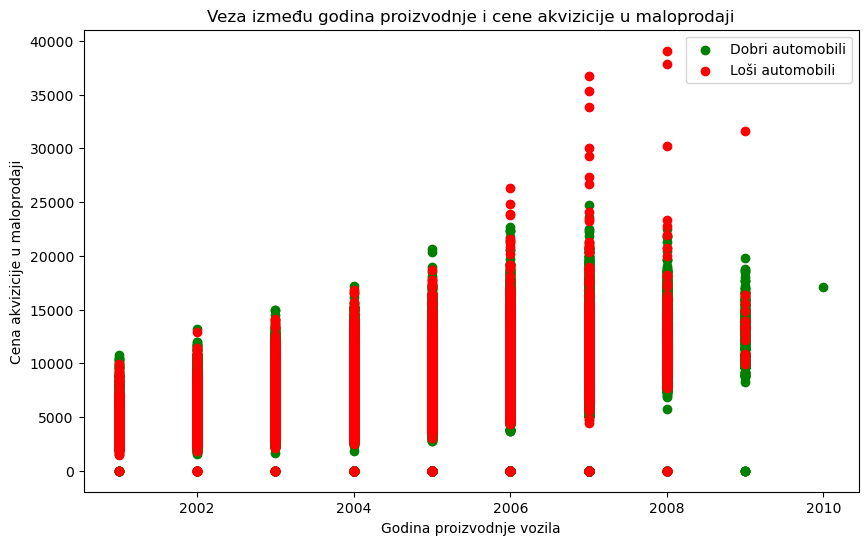

In [49]:
good_vehicles = df[df['IsBadBuy'] == 0]

bad_vehicles = df[df['IsBadBuy'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(good_vehicles['VehYear'], good_vehicles['MMRAcquisitionRetailAveragePrice'], color='green', label='Dobri automobili')
plt.scatter(bad_vehicles['VehYear'], bad_vehicles['MMRAcquisitionRetailAveragePrice'], color='red', label='Loši automobili')

plt.xlabel('Godina proizvodnje vozila')
plt.ylabel('Cena akvizicije u maloprodaji')
plt.title('Veza između godina proizvodnje i cene akvizicije u maloprodaji')

plt.legend()

plt.show()

Vidimo direktnu vezu izmedju godine proizvodnje i cene akvizicije vozila u maloprodaji.

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

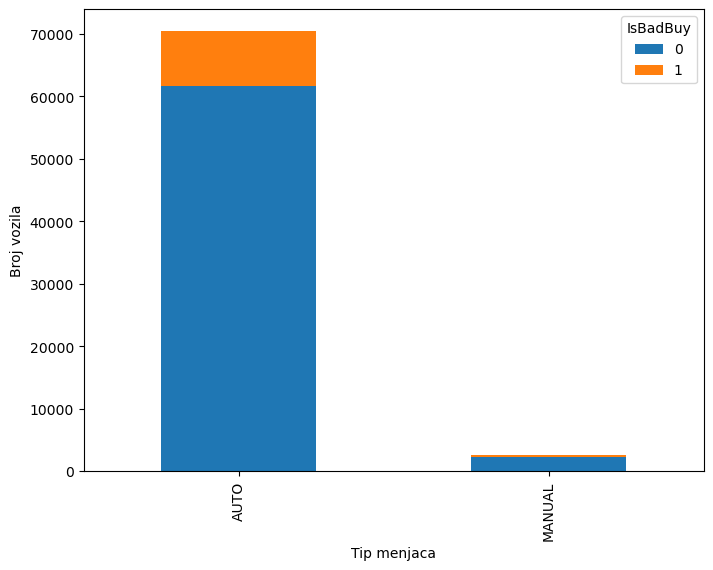

In [50]:
counts = df.groupby(['Transmission', 'IsBadBuy']).size().unstack()

counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel('Tip menjaca')
plt.ylabel('Broj vozila')
plt.title

Veća je verovatnoća da će se kupiti loš auto sa automatskim menjačem.

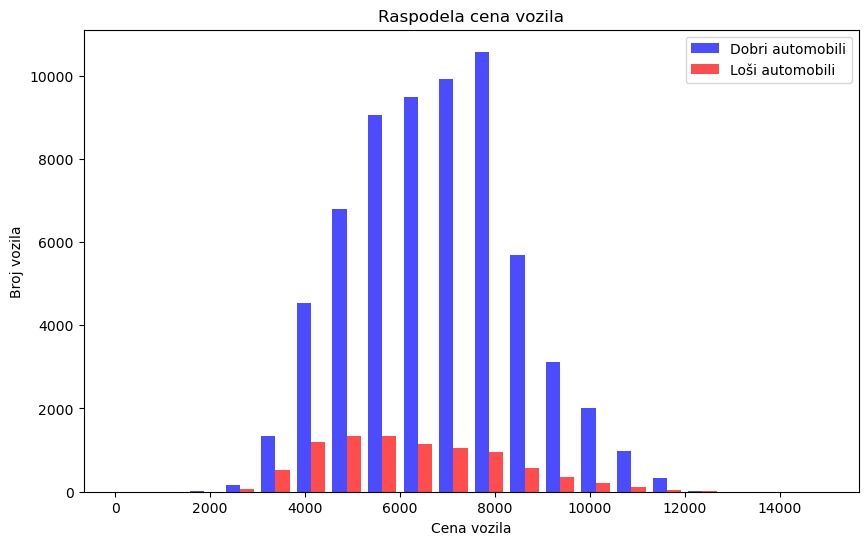

In [51]:
dataVehicle = df[['IsBadBuy', 'VehBCost']]

good_vehicles = dataVehicle[dataVehicle['IsBadBuy'] == 0]['VehBCost']

bad_vehicles = dataVehicle[dataVehicle['IsBadBuy'] == 1]['VehBCost']

plt.figure(figsize=(10, 6))
plt.hist([good_vehicles, bad_vehicles], bins=20, range=(0, 15000), color=['blue', 'red'], label=['Dobri automobili', 'Loši automobili'], alpha=0.7)

plt.xlabel('Cena vozila')
plt.ylabel('Broj vozila')
plt.title('Raspodela cena vozila')

plt.legend()

plt.show()

Uglavnom se automobili kupuju u cenovnom rangu 4000-8000 novcanih jedinica.

## IZVOĐENJE NOVIH ATRIBUTA

In [52]:
df['AcquisitionToRetailPriceRatio'] = df['MMRAcquisitionRetailAveragePrice']/df['MMRAcquisitionAuctionAveragePrice']

Odnos akvizicije i maloprodajne cene=Cena akvizije za vozilo u maloprodaji u prosecnom stanju u vremenu kupovine/Cena akvizicije vozila u prosecnom stanju u vremenu kupovine

In [53]:
df['AcquisitionToRetailPriceRatio'].dtype

dtype('float64')

In [54]:
df['AcquisitionToRetailPriceRatio'].isna().sum()

828

In [55]:
float_kolone = df.select_dtypes(include=['float64']).columns
medijane = df[float_kolone].median()
df[float_kolone] = df[float_kolone].fillna(medijane)

In [56]:
df['AcquisitionToRetailPriceRatio'].isna().sum()

0

In [57]:
def categorize_vehicle_age(age):
    if age < 2:
        return "mlado"
    elif age >= 2 and age < 5:
        return "srednje"
    else:
        return "starije"

df['VehicleAgeCategory'] = df['VehicleAge'].apply(categorize_vehicle_age)

In [58]:
df['VehicleAgeCategory'].dtype

dtype('O')

In [59]:
df['VehicleAgeCategory'].isna().sum()

0

In [60]:
df['VehicleAgeCategory'].value_counts()

VehicleAgeCategory
srednje    41397
starije    28490
mlado       3096
Name: count, dtype: int64

In [61]:
ageCat = pd.get_dummies(df['VehicleAgeCategory'])
df = pd.concat([df, ageCat], axis=1)

In [62]:
def determine_vehicle_condition(acquisition_price, current_price):
    if current_price < acquisition_price:
        return "ispod proseka"
    elif current_price > acquisition_price:
        return "iznad proseka"
    else:
        return "prosečno"

df['VehicleCondition'] = df.apply(lambda row: determine_vehicle_condition(row['MMRAcquisitionAuctionAveragePrice'], row['MMRCurrentAuctionAveragePrice']), axis=1)

In [63]:
df['VehicleCondition'].dtype

dtype('O')

In [64]:
stanje = pd.get_dummies(df['VehicleCondition'])
df = pd.concat([df, stanje], axis=1)

Ovaj deo koda kreira novu kolonu 'VehicleProfitMargin' u DataFrame-u df, koja prikazuje profitnu maržu svakog vozila kao procenat. Na taj način možete lako analizirati profitabilnost vozila na osnovu razlike između troška nabavke i trenutne aukcijske cene.

In [65]:
def calculate_profit_margin(acquisition_cost, current_auction_price):
    profit_margin = ((current_auction_price - acquisition_cost) / acquisition_cost) * 100
    return profit_margin

df['VehicleProfitMargin'] = df.apply(lambda row: calculate_profit_margin(row['VehBCost'], row['MMRCurrentAuctionAveragePrice']), axis=1)

In [66]:
df['VehicleProfitMargin'].dtype

dtype('float64')

In [67]:
df['VehicleProfitMargin'].isna().sum()

0

In [68]:
string_cols = df.select_dtypes(include=['object']).columns
print(string_cols)

Index(['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST',
       'Region', 'trim kategorija', 'Karakteristike', 'Modeli',
       'VehicleAgeCategory', 'VehicleCondition'],
      dtype='object')


In [69]:
df = df.drop(string_cols, axis=1)
print(df)

       IsBadBuy  PurchDate  VehYear  VehicleAge  VehOdo  \
0             0 2009-12-07     2006           3   89046   
1             0 2009-12-07     2004           5   93593   
2             0 2009-12-07     2005           4   73807   
3             0 2009-12-07     2004           5   65617   
4             0 2009-12-07     2005           4   69367   
...         ...        ...      ...         ...     ...   
72978         1 2009-12-02     2001           8   45234   
72979         0 2009-12-02     2007           2   71759   
72980         0 2009-12-02     2005           4   88500   
72981         0 2009-12-02     2006           3   79554   
72982         0 2009-12-02     2006           3   66855   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
0                                 8155.0                           9829.0   
1                                 6854.0                           8383.0   
2                                 3202.0                    

In [70]:
df = df.drop('PurchDate', axis=1)
print(df.head())

   IsBadBuy  VehYear  VehicleAge  VehOdo  MMRAcquisitionAuctionAveragePrice  \
0         0     2006           3   89046                             8155.0   
1         0     2004           5   93593                             6854.0   
2         0     2005           4   73807                             3202.0   
3         0     2004           5   65617                             1893.0   
4         0     2005           4   69367                             3913.0   

   MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
0                           9829.0                           11636.0   
1                           8383.0                           10897.0   
2                           4760.0                            6943.0   
3                           2675.0                            4658.0   
4                           5054.0                            7723.0   

   MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
0                        

In [71]:
df.head()

,IsBadBuy,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,Prednji pogon,Zadnji pogon,AcquisitionToRetailPriceRatio,mlado,srednje,starije,ispod proseka,iznad proseka,prosečno,VehicleProfitMargin
0,0,2006,3,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,...,False,False,1.426855,False,True,False,True,False,False,4.943662
1,0,2004,5,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,...,False,False,1.589875,False,False,True,False,True,False,-1.894737
2,0,2005,4,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,...,False,False,2.168332,False,True,False,False,True,False,-17.653061
3,0,2004,5,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,...,False,False,2.460644,False,False,True,True,False,False,-55.024390
4,0,2005,4,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,...,False,False,1.973677,False,True,False,True,False,False,-18.825000


## KLASIFIKACIJA PRE NORMALIZACIJE

In [88]:
import warnings
warnings.filterwarnings("ignore")
import sklearn

In [101]:
X = df.loc[:, df.columns != 'IsBadBuy']
y = df['IsBadBuy']

##  k-NN

k-NN algoritam je izabran zbog svoje jednostavnosti i lakoće implementacije. Ovaj algoritam funkcioniše tako što pronalazi najbliže susede na osnovu udaljenosti između podataka. Takođe, ne postavlja pretpostavke o distribuciji podataka, što ga čini fleksibilnim i sposobnim da se nosi sa različitim vrstama podataka. Otporan je na šum u podacima jer se oslanja na lokalnu strukturu podataka, odnosno na najbliže susede. Daje interpretabilne rezultate jer se zasniva na konkretnim instancama u podacima. Može se prilagoditi različitim vrstama problema, uključujući neravnotežene skupove podataka.

Međutim, k-NN algoritam ima i određene nedostatke. Spor je za velike skupove podataka, jer zahteva izračunavanje udaljenosti za svaki uzorak prilikom predikcije. Takođe, nije u stanju da nauči složene relacije između obeležja, jer se oslanja na lokalne informacije.

In [90]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'IsBadBuy']
y = df['IsBadBuy']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, stratify=y)

train_test_split se koristi da bi se podelio skup na dva dela: skup za obucavanje i skup za testiranje. Ova podela je vazna kako bi se mogle proceniti performanse modela na nezavisnim podacima i izbeci overfitting modela. Ukratko, procenjuje se sposobnost modela da generalizuje i donosi predikcije na nepoznatim podacima. Ako se isti skup podataka koristi i za obucavanje i za testiranje, model se moze previse prilagoditi skupu podataka, sto dovodi da model nauci pamcenjem podataka umesto generalizoovanjem pravila. Koriscenjem ove funckije, pruzamo objektivnost pti ptoceni tacnosti modela.

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
pred = knn.predict(X_test)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat = confusion_matrix(y_test, pred)
print(conf_mat)

[[18737   465]
 [ 2562   131]]


In [94]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     19202
           1       0.22      0.05      0.08      2693

    accuracy                           0.86     21895
   macro avg       0.55      0.51      0.50     21895
weighted avg       0.80      0.86      0.82     21895



Precision je mera tacnosti predickija za odredjenu klasu. Racuna se kao odnos broja tacno pozitivnih predikcija i zbiru tacno pozitivnih i lazno pozitivnih predikcija. Preciznost za klasu 0 je 88% pozitivnih predikcija za tu klasu je tacno, a za klasu 1 je samo 23%.

Recall meri sposobnost modela da pronadje sve pozitivne instance. Racuna se kao odnos broja tacno pozitivnih predikcija i zbiru tacno pozitivnih i lazno negativnih predikcija. Odziv za klasu 0 je 98% sto znaci da je model uspeo da identifikuje 98% stvarno pozitivnih instanci re klase, a za klasu 1 je recall samo 5%.

F1 score je harmonijska sredina preciznosti i odziva. Racuna se kao 2*(preciznost*odziv)/(preciznost+odziv). Predstavlja balans izmedju tacnosti predickija i sposobnosti pronalazenja pozitivnih instanci. Za klasu 0 je 0,93, a za klasu 1 je 0,08.

Tacnost je ukupna tacnost modela, tj. odnos tacno klasifikovanih instanci prema ukupnom broju instanci. Tacnost je 0,86 sto znaci da je model tacno identifikovao 86% instanci.

Macro avg i Weighted acg su prosecne vrednosti preciznosti, odziva i F1 mere za sve klase. Macro racuna prosecne vrednosti bez obzira na distribuciju podataka, a weighted racuna prosecne vrednosti ponderisane prema supportu svake klase.

Posto su podaci nebalansirani i prosecne vrednosti daju prednost dominantnoj klasi, weighted omogucava prilagodjavanje podrsci svake klase: preciznost za ceo model je 80%, recall je 86%, f1 je 82% i tacnost je 86%.

### Cross-validacija

In [98]:
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier()

results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
f'Tačnost iznosi {round(np.mean(results) * 100, 2)}% +/- {round(np.std(results)*100, 2)}%'

'Tačnost iznosi 86.03% +/- 0.42%'

'Tačnost iznosi 86.03% +/- 0.42%'
Cross-validacijom zelimo objektivno da procenimo performanse modela i smanjimo uticaj slucajnog odabira trening i test skupa. Podrazumeva podelu dostupnih podataka na vise delova i ponavljanje postupka obucavanja i evaluacije modela na razlicitm kombinacijama tih podskupova. Ovde smo dobili tacnost pre optimizacije parametara.

### Optimizacija parametara

model = KNeighborsClassifier(n_neighbors=2)

results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
f'Tačnost iznosi {round(np.mean(results) * 100, 2)}% +/- {round(np.std(results)*100, 2)}%'

In [ ]:
Tačnost +- standardna devijacija

In [ ]:
Kada smo izmenili parametre za odredjivanje broja najblizih suseda koje KNN koristi za identifikaciju novih instanci povecali smo tacnost za 0,32%. Mogu se izmeniti i sledeci parametri:

weights: kontrolise nacin na koji se uzima u obzir udaljenost suseda prilikom donosenja odluka, moze biti uniform ili distance

metric: odredjuje metriku koja se koristi za racunanje udaljenosti izmedju instanci - euclidean, manhattan, chebyshev..

n_jobs: odredjuje broj paralelnih poslova koji se izvrsavaju prilikom racunanja; moze ubrzati proces obucavanja i predikcije ako se koristi vise jezgara

### AUC i ROC kriva

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

auc_score = auc(fpr, tpr)

In [105]:
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])

print("AUC Score:", auc_score)

AUC Score: 0.5484543820535037


AUC se koristi za evaluaciju performansi klasifikacionog modela na osnovu ROC krive. ROC kriva je grafik koji prikazuje odnos izmedju True Positive Rate i False Positive Rate pri razlicitim pragovima klasifikacije. AUC je numericka vrednost koja predstavlja povrsinu ispod ROC krive. Vrednost se krece izmedju 0 i 1 gde veca vrednost ukazuje na bolji diskriminatorni kapacitet modela. Ne zavisi od odabira odredjenog praga klasifiakcije i daje opstu sliku o performansama modela na svim mogucim pragovima.

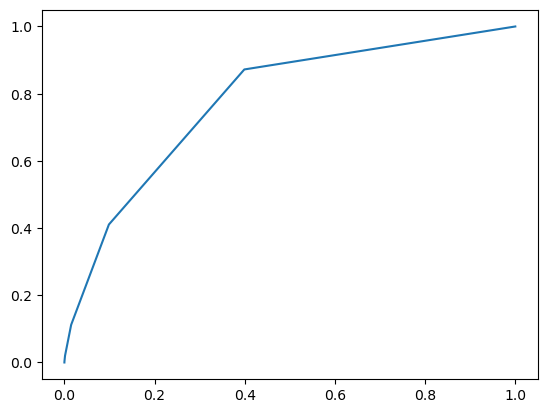

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X, y)

fpr, tpr, thresholds = roc_curve(y, knn.predict_proba(X)[:, 1])

plt.plot(fpr, tpr)

Model ima bolju diskriminatorsnu sposobnost od nasumicnog izbora.

## NAIVE BAYES

Naive Bayes algoritam je izabran zbog svoje jednostavnosti i efikasnosti. Ovaj algoritam se zasniva na Bayesovoj teoremi i pretpostavci o nezavisnosti izmedju obelezja. Njegova efikasnost dolazi iz brzog izracunavanja verovatnoca na osnovu trening skupa podataka. Efikasan je cak i za velike skupove podataka. Naive Bayes je dobra izbor kada se radi sa visokodimenzionalnim podacima. Može se nositi sa nedostajucim vrednostima jer izracunava verovatnoce na osnovu dostupnih informacija o obelezjima. Pruza jasne i interpretabilne rezultate.

Nedostaci ovog algoritma jesu pretpostavka o nezavisnosti sto dovodi do nepreciznih rezultata, nedovoljna sposobnost modeliranja slozenih relacija i nesposobnost za ucenje interakcije medju obelezjima jer se naslanja na pretpostavku o nezavisnosti.

In [109]:
test_size = 0.3

In [110]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

In [111]:
y_pred = nbc.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     13877
           1       0.11      0.27      0.16       720

    accuracy                           0.86     14597
   macro avg       0.54      0.58      0.54     14597
weighted avg       0.92      0.86      0.88     14597



In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
cm = (confusion_matrix(y_test, y_pred))
print(cm)

[[12325   525]
 [ 1552   195]]


### Cross-validacija

In [115]:
model = GaussianNB()

results = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
f'Tacnost iznosi {round(np.mean(results)*100, 2)}% +/- {round(np.std(results)*100, 2)}%'

'Tacnost iznosi 84.21% +/- 3.23%'

### Optimizacija parametara

In [116]:
model = GaussianNB(var_smoothing = 1e-10)

results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
f'Tacnost iznosi {round(np.mean(results)*100, 2)}% +/- {round(np.std(results)*100, 2)}'

'Tacnost iznosi 83.17% +/- 3.34'

Ovde je optimizovan parametar var_smoothing koji predstavlja regulatorsku konstantu koja se dodaje u varijanse obelezja kako bi se izbeglo deljenje sa nulom kada se racunaju verovatnoće. Manje vrednosti var_smoothing povećavaju regularizaciju. Međutim, ovde se tačnost smanjila. Jos jedan parametar koji se može optimizovati jeste:

priors - omogućava ručno postavljanje priora za klasifikacione klase

### AUC i ROC kriva

In [118]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, nbc.predict_proba(X)[:, 1])


0.6501815079717634

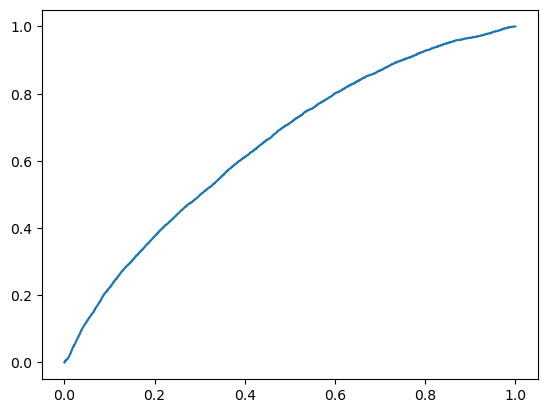

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

model = GaussianNB()
model.fit(X, y)

fpr, tpr, thresholds = roc_curve(y, nbc.predict_proba(X)[:, 1])

plt.plot(fpr, tpr)

## Random forest

Random Forest se koristi zbog svoje visoke tačnosti u klasifikaciji, jer kombinuje prednosti mnogih stabala odlučivanja. Manje je sklon preprilagođavanju u odnosu na pojedinačna stabla odlučivanja. Može efikasno da radi sa visokodimenzionalnim podacima jer automatski bira relevantna obeležja i ignoriše irelevantna. Relativno je otporan na prisustvo suma i nedostajućih vrednosti u podacima jer se oslanja na većinsko mišljenje više stabala.

Nedostaci koji se javljaju jesu to sto pruža manju interpretabilnost i teže je izvući jasne zaključke o tome koji atributi su najvažniji za klasifikaciju. Ovi modeli mogu biti složeni sto može zahtevati veću memoriju i vreme izvršavanja.

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rfc = RandomForestClassifier()

In [122]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
rfc_pred = rfc.predict(X_test)

In [128]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12850
           1       0.83      0.12      0.21      1747

    accuracy                           0.89     14597
   macro avg       0.86      0.56      0.57     14597
weighted avg       0.89      0.89      0.85     14597



In [129]:
print(confusion_matrix(y_test, rfc_pred))

[[12808    42]
 [ 1541   206]]


### Cross-validacija

In [135]:
model = RandomForestClassifier()

results = cross_val_score(model, X, y, cv = 10, scoring = 'accuracy')
f'Tacnost iznosi {round(np.mean(results)*100, 2)}% +/- {round(np.std(results)*100, 2)}%'

'Tacnost iznosi 88.54% +/- 0.65%'

### Optimizacija parametara

In [136]:
model = RandomForestClassifier(n_estimators=10)

results = cross_val_score(model, X, y, cv = 10, scoring = 'accuracy')
f'Tacnost iznosi {round(np.mean(results)*100, 2)}% +/- {round(np.std(results)*100, 2)}%'

'Tacnost iznosi 87.94% +/- 0.48%'

Parametar koji je optimizovan jeste n_estimators. On predstavlja broj stabala koji ce biti konstruisani u modelu. Veći broj stabala može dovesti do bolje tačnosti modela, ali takođe povećava vreme izvršavanja. Mogu se optimizovati i seldeci paramteri:

max_depth - određuje maksimalnu dubinu stabala. Veća dubina moze dovesti do kompleksnijeg modela, ali povećava rizik od preprilagođavanja

min_samples_split - odrešuje minimalni broj uzoraka potreban za podelu čvora stabla. Povećanje ove vrednosti može dovesti do smanjenja preprilagođavanja, ali može smanjiti i fleksibilnost modela

max_features - određuje maksimalni broj obeležja koji će biti razmatrani tokom konstrukcije svakog stabla

min_samples_leaf - određuje minimalni broj uzoraka potreban za formiranje listova u stablu. Povećanje vrednosti može dovesti do smanjenja preprilagođavanja, ali može smanjiti preciznost modela

### AUC i ROC kriva

In [138]:
roc_auc_score(y, rfc.predict_proba(X)[:,1])

0.9758805259768965

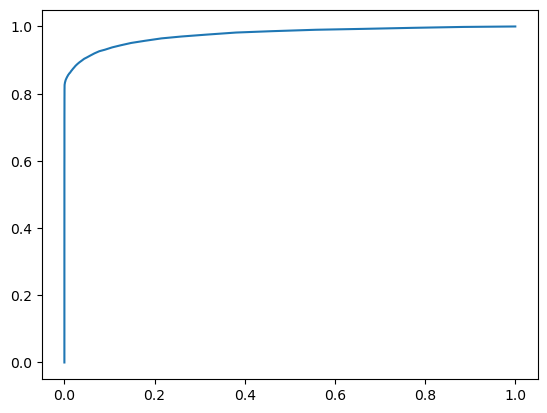

In [139]:
model = RandomForestClassifier()
model.fit(X, y)

fpr, tpr, thresholds = roc_curve(y, rfc.predict_proba(X)[:, 1])

plt.plot(fpr, tpr)

# REŠAVANJE AUTLAJERA

<Axes: >

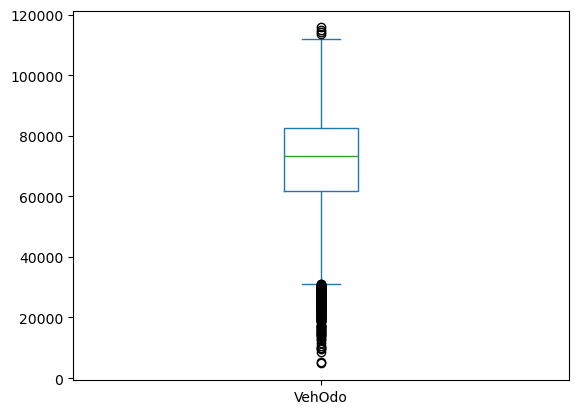

In [140]:
df['VehOdo'].plot(kind='box')

In [141]:
df = df.drop(df[df['VehOdo']<32000].index)

<Axes: >

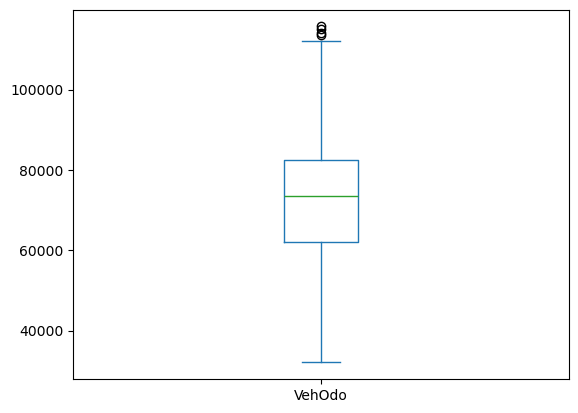

In [142]:
df['VehOdo'].plot(kind='box')

In [143]:
df = df.drop(df[df['VehOdo']>110000].index)

<Axes: >

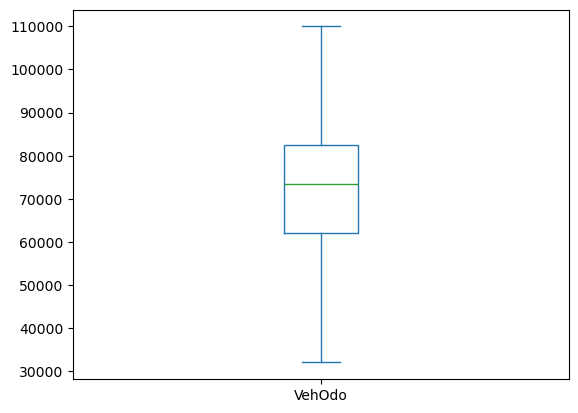

In [144]:
df['VehOdo'].plot(kind='box')

<Axes: >

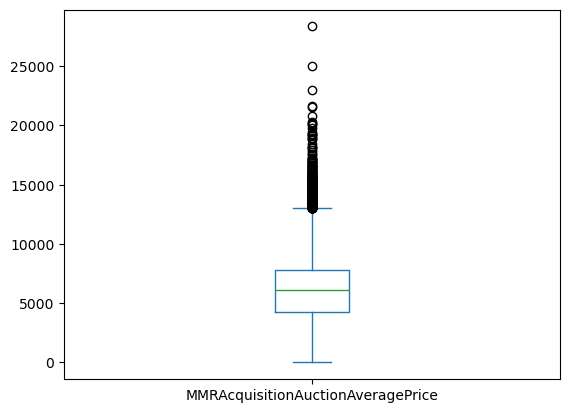

In [145]:
df['MMRAcquisitionAuctionAveragePrice'].plot(kind='box')

In [146]:
df = df.drop(df[df['MMRAcquisitionAuctionAveragePrice']>12500].index)

<Axes: >

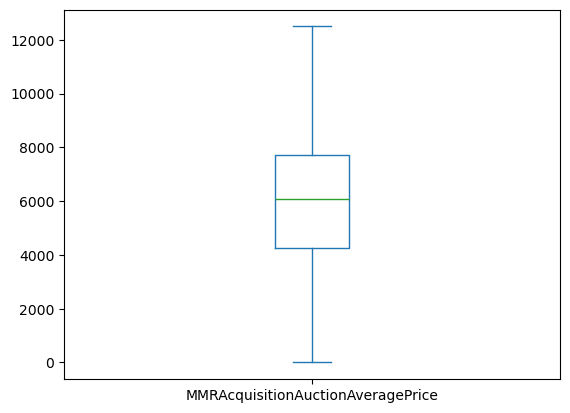

In [147]:
df['MMRAcquisitionAuctionAveragePrice'].plot(kind='box')

<Axes: >

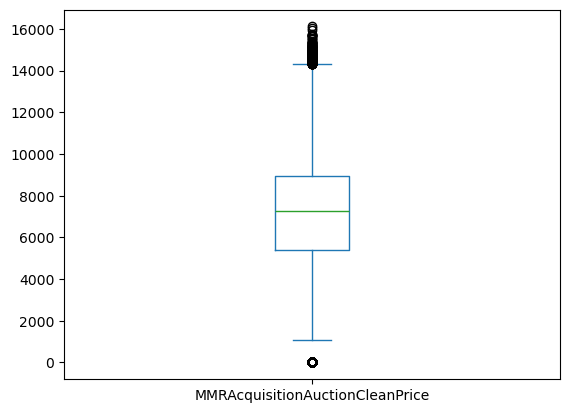

In [148]:
df['MMRAcquisitionAuctionCleanPrice'].plot(kind='box')

<Axes: >

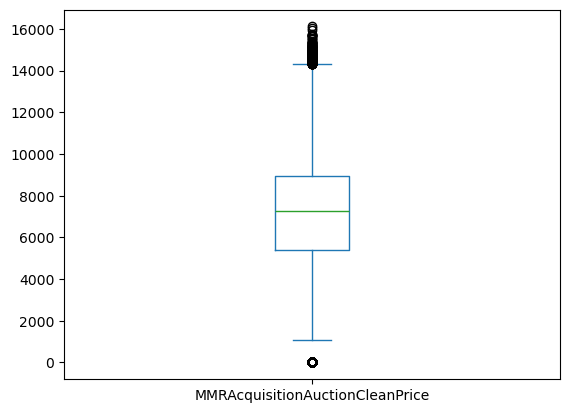

In [149]:
df['MMRAcquisitionAuctionCleanPrice'].plot(kind='box')

In [150]:
df = df.drop(df[df['MMRAcquisitionAuctionCleanPrice']<10].index)

<Axes: >

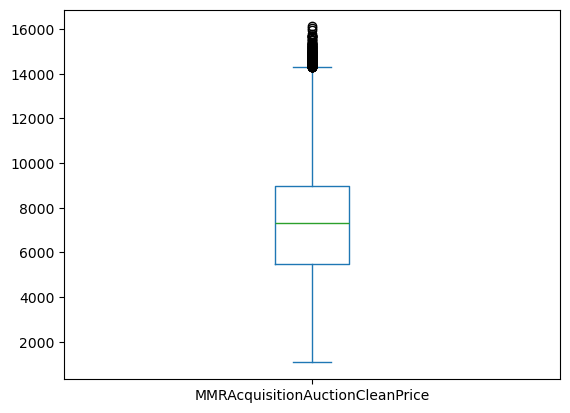

In [151]:
df['MMRAcquisitionAuctionCleanPrice'].plot(kind='box')

<Axes: >

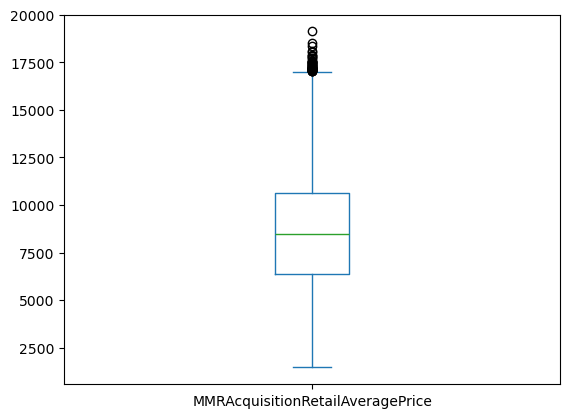

In [152]:
df['MMRAcquisitionRetailAveragePrice'].plot(kind='box')

In [153]:
df = df.drop(df[df['MMRAcquisitionRetailAveragePrice']>17000].index)

<Axes: >

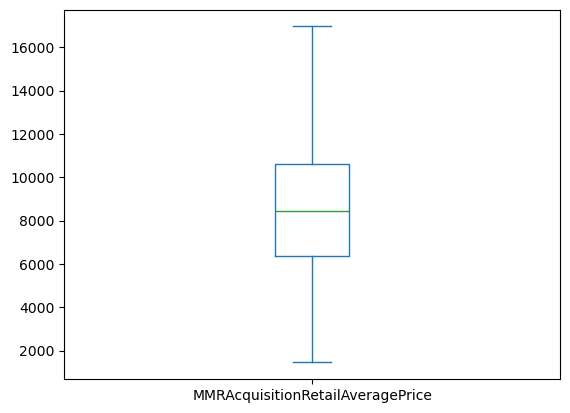

In [154]:
df['MMRAcquisitionRetailAveragePrice'].plot(kind='box')

<Axes: >

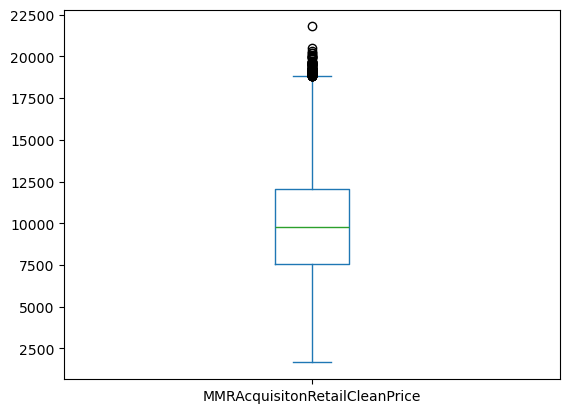

In [155]:
df['MMRAcquisitonRetailCleanPrice'].plot(kind='box')

In [156]:
df = df.drop(df[df['MMRAcquisitonRetailCleanPrice']>18000].index)

<Axes: >

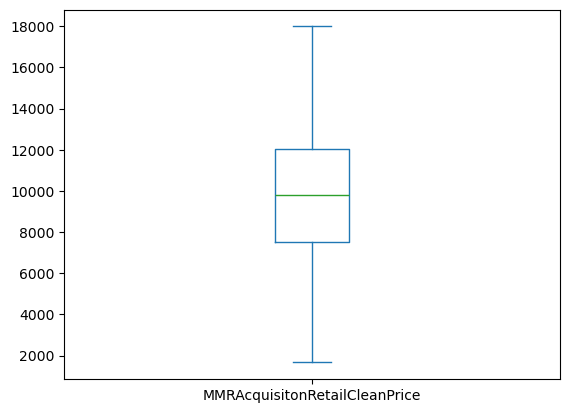

In [157]:
df['MMRAcquisitonRetailCleanPrice'].plot(kind='box')

<Axes: >

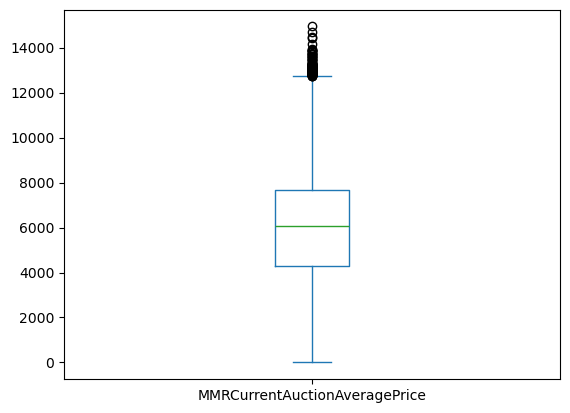

In [158]:
df['MMRCurrentAuctionAveragePrice'].plot(kind='box')

In [159]:
df=df.drop(df[df['MMRCurrentAuctionAveragePrice']>11000].index)

<Axes: >

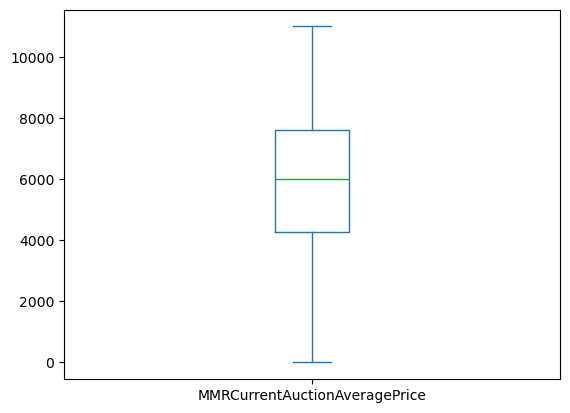

In [160]:
df['MMRCurrentAuctionAveragePrice'].plot(kind='box')

<Axes: >

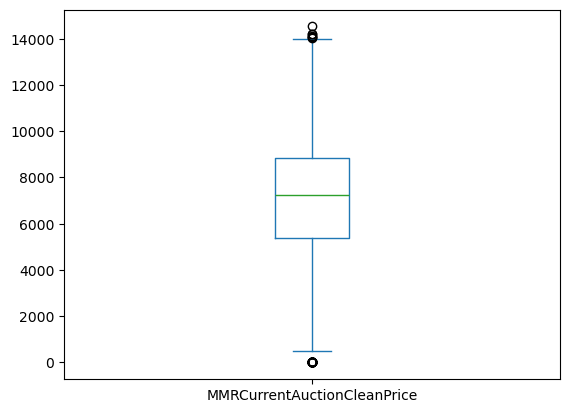

In [161]:
df['MMRCurrentAuctionCleanPrice'].plot(kind='box')

In [162]:
df = df.drop(df[df['MMRCurrentAuctionCleanPrice']>14000].index)

In [163]:
df = df.drop(df[df['MMRCurrentAuctionCleanPrice']<100].index)

<Axes: >

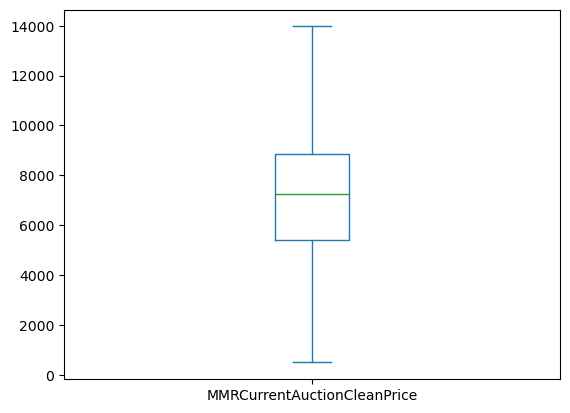

In [164]:
df['MMRCurrentAuctionCleanPrice'].plot(kind='box')

<Axes: >

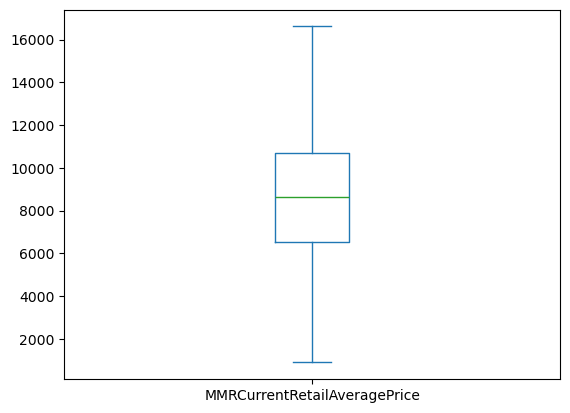

In [165]:
df['MMRCurrentRetailAveragePrice'].plot(kind='box')

<Axes: >

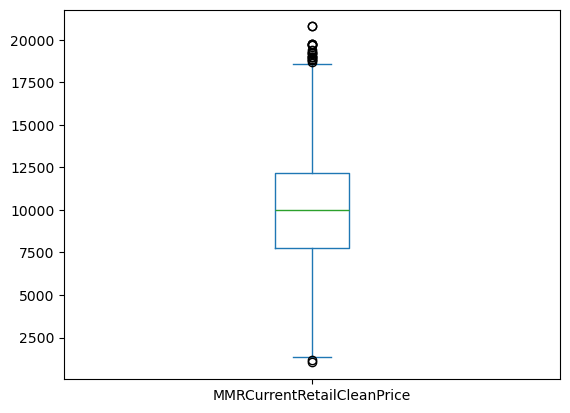

In [166]:
df['MMRCurrentRetailCleanPrice'].plot(kind='box')

In [167]:
df = df.drop(df[df['MMRCurrentRetailCleanPrice']>18000].index)

In [168]:
df = df.drop(df[df['MMRCurrentRetailCleanPrice']<2000].index)

<Axes: >

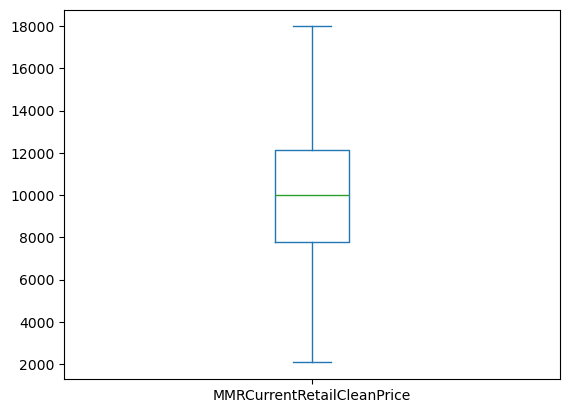

In [169]:
df['MMRCurrentRetailCleanPrice'].plot(kind='box')

<Axes: >

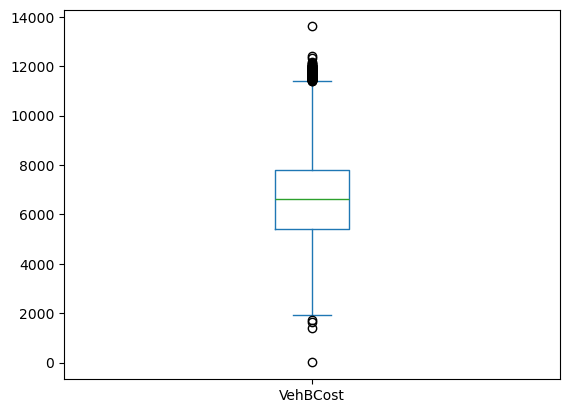

In [170]:
df['VehBCost'].plot(kind='box')

In [171]:
df = df.drop(df[df['VehBCost']>11000].index)

In [172]:
df = df.drop(df[df['VehBCost']<2000].index)

<Axes: >

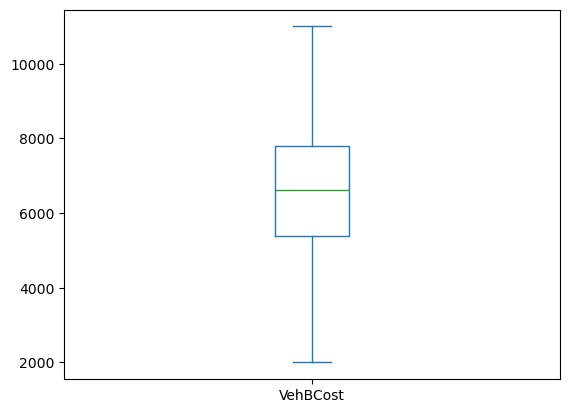

In [173]:
df['VehBCost'].plot(kind='box')

<Axes: >

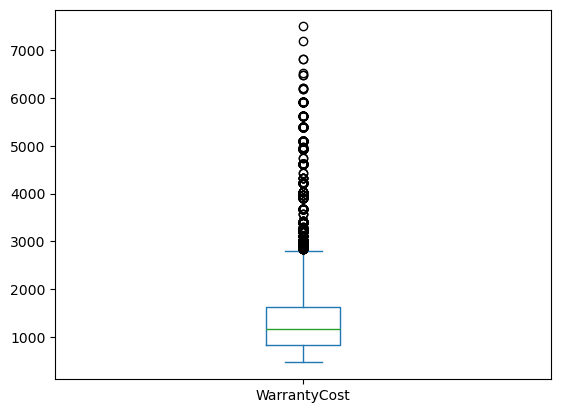

In [174]:
df['WarrantyCost'].plot(kind='box')

In [175]:
df = df.drop(df[df['WarrantyCost'] > 2600].index)

<Axes: >

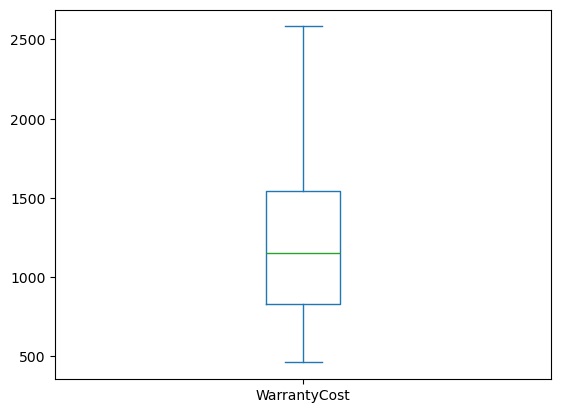

In [176]:
df['WarrantyCost'].plot(kind='box')

In [177]:
df.shape

(67900, 143)

# NORMALIZACIJA PODATAKA

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
kol = df.select_dtypes(include=['int64', 'float64']).columns
df[kol]=scaler.fit_transform(df[kol]))

In [ ]:
df['IsBadBuy'] = df['IsBadBuy'].astype(int)

# KLASIFIKACIJA NAKON NORMALIZACIJE

## k-NN

In [88]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'IsBadBuy']
y = df['IsBadBuy']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, stratify=y)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
pred = knn.predict(X_test)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat = confusion_matrix(y_test, pred)
print(conf_mat)

[[18739   463]
 [ 2566   127]]


In [92]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     19202
           1       0.22      0.05      0.08      2693

    accuracy                           0.86     21895
   macro avg       0.55      0.51      0.50     21895
weighted avg       0.80      0.86      0.82     21895



### Cross-validacija

In [93]:
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier()

results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
f'Tačnost iznosi {round(np.mean(results) * 100, 2)}% +/- {round(np.std(results)*100, 2)}%'

'Tačnost iznosi 86.03% +/- 0.42%'

### Optimizacija parametara

In [94]:
model = KNeighborsClassifier(n_neighbors=2)

results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
f'Tačnost iznosi {round(np.mean(results) * 100, 2)}% +/- {round(np.std(results)*100, 2)}%'

'Tačnost iznosi 86.32% +/- 0.25%'

### AUC i ROC kriva

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

auc_score = auc(fpr, tpr)

In [96]:
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])

print("AUC Score:", auc_score)

AUC Score: 0.5484543820535037


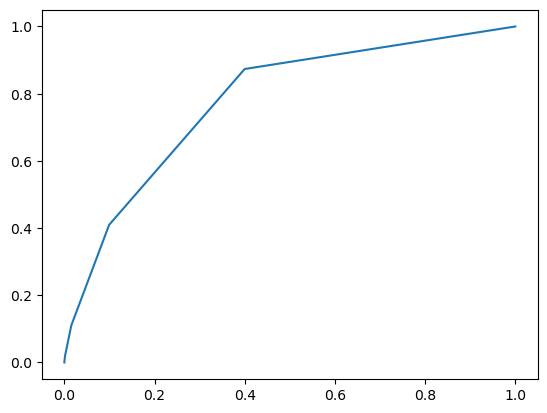

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X, y)

fpr, tpr, thresholds = roc_curve(y, knn.predict_proba(X)[:, 1])

plt.plot(fpr, tpr)

## NAIVE BAYES

In [98]:
test_size = 0.3

In [99]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

In [100]:
y_pred = nbc.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     13877
           1       0.11      0.27      0.16       720

    accuracy                           0.86     14597
   macro avg       0.54      0.58      0.54     14597
weighted avg       0.92      0.86      0.88     14597



In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
cm = (confusion_matrix(y_test, y_pred))
print(cm)

[[12325   525]
 [ 1552   195]]


### Cross-validacija

In [103]:
model = GaussianNB()

results = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
f'Tacnost iznosi {round(np.mean(results)*100, 2)}% +/- {round(np.std(results)*100, 2)}%'

'Tacnost iznosi 84.21% +/- 3.23%'

### Optimizacija parametara

In [104]:
model = GaussianNB(var_smoothing = 1e-10)

results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
f'Tacnost iznosi {round(np.mean(results)*100, 2)}% +/- {round(np.std(results)*100, 2)}'

'Tacnost iznosi 83.17% +/- 3.34'

### AUC i ROC kriva

In [105]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, nbc.predict_proba(X)[:, 1])

0.6501815079717634

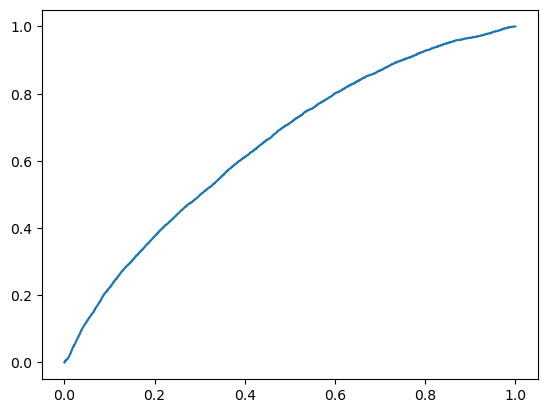

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

model = GaussianNB()
model.fit(X, y)

fpr, tpr, thresholds = roc_curve(y, nbc.predict_proba(X)[:, 1])

plt.plot(fpr, tpr)

## Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rfc = RandomForestClassifier()

In [109]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [110]:
rfc_pred = rfc.predict(X_test)

In [111]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12850
           1       0.83      0.12      0.21      1747

    accuracy                           0.89     14597
   macro avg       0.86      0.56      0.57     14597
weighted avg       0.88      0.89      0.85     14597



In [112]:
print(confusion_matrix(y_test, rfc_pred))

[[12807    43]
 [ 1541   206]]


### Cross-validacija

In [113]:
model = RandomForestClassifier()

results = cross_val_score(model, X, y, cv = 10, scoring = 'accuracy')
f'Tacnost iznosi {round(np.mean(results)*100, 2)}% +/- {round(np.std(results)*100, 2)}%'

'Tacnost iznosi 88.56% +/- 0.68%'

### Optmizacija parametara

In [114]:
model = RandomForestClassifier(n_estimators=10)

results = cross_val_score(model, X, y, cv = 10, scoring = 'accuracy')
f'Tacnost iznosi {round(np.mean(results)*100, 2)}% +/- {round(np.std(results)*100, 2)}%'

'Tacnost iznosi 88.11% +/- 0.5%'

### AUC i ROC kriva

In [115]:
roc_auc_score(y, rfc.predict_proba(X)[:,1])

0.9767418382297591

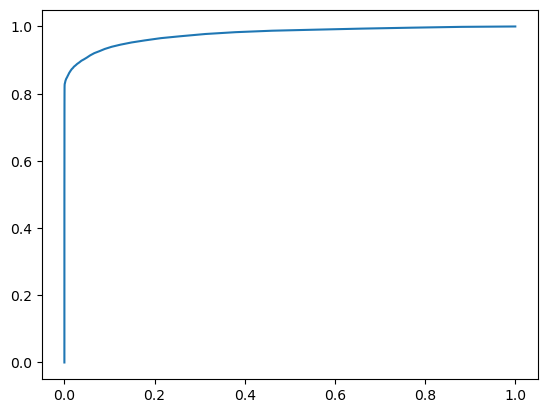

In [116]:
model = RandomForestClassifier()
model.fit(X, y)

fpr, tpr, thresholds = roc_curve(y, rfc.predict_proba(X)[:, 1])

plt.plot(fpr, tpr)

# SELEKCIJA ATRIBUTA

## ANALIZA GLAVNIH KOMPONENATA

PCA je tehnika koja se koristi za smanjenje dimenzionalnosti podataka tako što transformiše originalne osobine (atribute) u novi skup manjeg broja osobina, koji se nazivaju glavne komponente. Ideja PCA je da se pronađu linearna kombinacija originalnih osobina koje najbolje objašnjavaju varijabilnost u podacima. Glavne komponente su sortirane prema varijabilnosti koju objašnjavaju, tako da se većina varijabilnosti u podacima može zadržati sa manjim brojem glavnih komponenti. PCA se često koristi za vizuelizaciju podataka i smanjenje šuma u podacima, kao i za ubrzavanje računanja u modeliranju.

In [117]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

X = df.values  

selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_selected)

print("Smanjene dimenzije podataka:")
print(X_pca)

Smanjene dimenzije podataka:
[[ -7965.8662396  -16514.77909996   6159.79823254 ...    306.60713252
    -574.98536844   -256.31182917]
 [-11286.2151825  -20352.18472009   4874.35060988 ...   -667.98678135
    -370.69000816    260.80829695]
 [ -7209.95672409   -503.94414233  -5359.60807467 ...   -492.37953876
     434.95370913    558.49903653]
 ...
 [-11605.28430395 -15111.75170651   6563.73814563 ...   1343.4600844
      37.34056101    -60.37632881]
 [ -9049.90820049  -6215.74677993    404.0296145  ...   1070.73700138
     169.09637864   -567.36008861]
 [ -6859.8669381    6109.24879627   5125.50036564 ...   1224.1845658
    -237.09405713   -333.16885747]]


### PROVERA 

#### k-NN

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold

X = df.values  
y = df['IsBadBuy'].values

selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, stratify=y)

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     19202
           1       0.21      0.05      0.08      2693

    accuracy                           0.86     21895
   macro avg       0.54      0.51      0.50     21895
weighted avg       0.80      0.86      0.82     21895



#### NAIVE BAYES

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold

X = df.values  
y = df['IsBadBuy'].values

selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, stratify=y)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     19202
           1       0.26      0.10      0.15      2693

    accuracy                           0.85     21895
   macro avg       0.57      0.53      0.53     21895
weighted avg       0.81      0.85      0.82     21895



### RANDOM FOREST

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold

X = df.values  
y = df['IsBadBuy'].values

selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, stratify=y)

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     19202
           1       0.62      0.09      0.16      2693

    accuracy                           0.88     21895
   macro avg       0.75      0.54      0.55     21895
weighted avg       0.85      0.88      0.84     21895



## LINEAR DISCRIMINANT ANALYSIS

LDA je tehnika koja se koristi za smanjenje dimenzionalnosti i istovremeno očuvanje diskriminativnih informacija između klasa u podacima. Cilj LDA je da pronađe linearnu kombinaciju osobina koja maksimizuje razliku između klasa, dok minimizira varijabilnost unutar klasa. LDA se često koristi u problemima klasifikacije kako bi se poboljšala separabilnost klasa i smanjila dimenzionalnost podataka.

In [121]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold

X = df.values  
y = df['IsBadBuy'].values

selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_selected, y)

print("Smanjene dimenzije podataka:")
print(X_lda)

Smanjene dimenzije podataka:
[[-0.39785711]
 [-0.44882248]
 [ 0.56040964]
 ...
 [-0.26218454]
 [ 0.00273858]
 [-0.01035092]]


### PROVERA 

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold

X = df.values  
y = df['IsBadBuy'].values

selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, stratify=y)

lda = LinearDiscriminantAnalysis()

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_lda, y_train)

y_pred = knn.predict(X_test_lda)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     19202
           1       0.36      0.11      0.17      2693

    accuracy                           0.87     21895
   macro avg       0.62      0.54      0.55     21895
weighted avg       0.82      0.87      0.83     21895



### Naive Bayes

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold

X = df.values  
y = df['IsBadBuy'].values

selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, stratify=y)

lda = LinearDiscriminantAnalysis()

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

nb = GaussianNB()
nb.fit(X_train_lda, y_train)

y_pred = nb.predict(X_test_lda)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     19202
           1       0.52      0.12      0.19      2693

    accuracy                           0.88     21895
   macro avg       0.70      0.55      0.56     21895
weighted avg       0.84      0.88      0.84     21895



### Random Forest 

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold

X = df.values  
y = df['IsBadBuy'].values

selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, stratify=y)

lda = LinearDiscriminantAnalysis()

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train_lda, y_train)

y_pred = rf.predict(X_test_lda)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     19202
           1       0.21      0.18      0.19      2693

    accuracy                           0.82     21895
   macro avg       0.55      0.54      0.54     21895
weighted avg       0.80      0.82      0.81     21895



# TESTIRANJE MODELA NA TEST SKUPU

In [125]:
data = pd.read_csv('test.csv')

In [126]:
data.isna().sum()

RefId                                    0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1550
SubModel                                 5
Color                                    4
Transmission                             3
WheelTypeID                           2188
WheelType                             2188
VehOdo                                   0
Nationality                              7
Size                                     7
TopThreeAmericanName                     7
MMRAcquisitionAuctionAveragePrice       10
MMRAcquisitionAuctionCleanPrice         10
MMRAcquisitionRetailAveragePrice        10
MMRAcquisitonRetailCleanPrice           10
MMRCurrentAuctionAveragePrice          143
MMRCurrentAuctionCleanPrice            143
MMRCurrentR

In [127]:
data = data.drop(['PRIMEUNIT', 'AUCGUART', 'RefId', 'WheelTypeID', 'VNZIP1'], axis=1)

In [128]:
kolone = data.select_dtypes(include=['object']).columns
najcesce_vrednosti = data[kolone].mode().iloc[0]
data[kolone]=data[kolone].fillna(najcesce_vrednosti)

In [129]:
float_kolone = data.select_dtypes(include=['float64']).columns
medijane = data[float_kolone].median()
data[float_kolone] = data[float_kolone].fillna(medijane)

In [130]:
data['PurchDate'] = pd.to_datetime(data['PurchDate'])

In [131]:
data['Godina'] = data['PurchDate'].dt.year
data['Mesec'] = data['PurchDate'].dt.month
data['Kvartal'] = data['PurchDate'].dt.quarter

In [132]:
group = data.groupby(['Godina', 'Mesec', 'Kvartal']).size().reset_index(name='Broj')

In [133]:
def mapiraj_na_region(skraćenica):
    severne_države = ['ME', 'NH', 'VT', 'NY', 'MA', 'RI', 'CT', 'NJ', 'PA']
    jugoistok_države = ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL']
    srednje_države = ['OH', 'IN', 'MI', 'IL', 'WI', 'MN', 'IA', 'MO']
    jugozapad_države = ['ND', 'SD', 'NE', 'KS', 'OK', 'TX']
    zapadne_države = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV']
    pacifičke_države = ['WA', 'OR', 'CA', 'HI', 'AK']

    if skraćenica in severne_države:
        return 'Sever'
    elif skraćenica in jugoistok_države:
        return 'Jugoistok'
    elif skraćenica in srednje_države:
        return 'Srednji deo'
    elif skraćenica in jugozapad_države:
        return 'Jugozapad'
    elif skraćenica in zapadne_države:
        return 'Zapad'
    elif skraćenica in pacifičke_države:
        return 'Pacifički region'
    else:
        return 'Nepoznat region'

In [134]:
data['Region'] = data['VNST'].apply(mapiraj_na_region)

In [135]:
def mapiraj_na_region(skraćenica):
    severne_države = ['ME', 'NH', 'VT', 'NY', 'MA', 'RI', 'CT', 'NJ', 'PA']
    jugoistok_države = ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL']
    srednje_države = ['OH', 'IN', 'MI', 'IL', 'WI', 'MN', 'IA', 'MO']
    jugozapad_države = ['ND', 'SD', 'NE', 'KS', 'OK', 'TX']
    zapadne_države = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV']
    pacifičke_države = ['WA', 'OR', 'CA', 'HI', 'AK']

    if skraćenica in severne_države:
        return 'Sever'
    elif skraćenica in jugoistok_države:
        return 'Jugoistok'
    elif skraćenica in srednje_države:
        return 'Srednji deo'
    elif skraćenica in jugozapad_države:
        return 'Jugozapad'
    elif skraćenica in zapadne_države:
        return 'Zapad'
    elif skraćenica in pacifičke_države:
        return 'Pacifički region'
    else:
        return 'Nepoznat region'

In [136]:
data['Region'] = data['VNST'].apply(mapiraj_na_region)

In [137]:
grupisani_podaci = data.groupby('Region').size().reset_index(name='Broj')

In [138]:
Region = pd.get_dummies(data['Region'])
data = pd.concat([data, Region], axis=1)

In [139]:
Auction = pd.get_dummies(data['Auction'])
data = pd.concat([data, Auction], axis=1)

In [140]:
Color = pd.get_dummies(data['Color'])
data = pd.concat([data, Color], axis = 1)

In [141]:
Transmission = pd.get_dummies(data['Transmission'])
data = pd.concat([data, Transmission], axis = 1)

In [142]:
WheelType = pd.get_dummies(data['WheelType'])
data = pd.concat([data, WheelType], axis = 1)

In [143]:
Nationality = pd.get_dummies(data['Nationality'])
data = pd.concat([data, Nationality], axis = 1)

In [144]:
Size = pd.get_dummies(data['Size'])
data = pd.concat([data, Size], axis = 1)

In [145]:
Top = pd.get_dummies(data['TopThreeAmericanName'])
data = pd.concat([data, Top], axis = 1)

In [146]:
Region = pd.get_dummies(data['Region'])
data = pd.concat([data, Region], axis = 1)

In [147]:
def mapiraj_trim_nivo(trim_nivo):
    kategorije = {
        'L': 'Luksuzni',
        'B': 'Osnovni',
        'S': 'Sportski',
        'T': 'Touring',
        'X': 'Extra',
        'E': 'Extra',
        'G': 'Grande',
        'C': 'Classic',
    }

    if trim_nivo[0] in kategorije:
        return kategorije[trim_nivo[0]]
    else:
        return 'Ostalo'

data['trim kategorija'] = data['Trim'].apply(mapiraj_trim_nivo)

grupisani_podaci = data.groupby('trim kategorija').size().reset_index(name='Broj')

In [148]:
trim = pd.get_dummies(data['trim kategorija'])
data = pd.concat([data, trim], axis=1)

In [149]:
def izdvoji_oznaku(submodel):
    oznaka = submodel.split()[0]  
    kategorije = {
        '4D': '4 vrata',
        '2D': '2 vrata',
        'EXT': 'Produžen',
        'MINIVAN': 'Minivan',
        'QUAD': 'Kvad',
        'REG': 'Regular Cab',
        'CREW': 'Crew Cab',
    }

    if oznaka in kategorije:
        return kategorije[oznaka]
    else:
        return 'Ostalo'

data['Karakteristike'] = data['SubModel'].apply(izdvoji_oznaku)

grupisani_podaci = data.groupby('Karakteristike').size().reset_index(name='Broj')


In [150]:
kategorije = pd.get_dummies(data['Karakteristike'])
data = pd.concat([data, kategorije], axis=1)

In [151]:
brend = pd.get_dummies(data['Make'])
data = pd.concat([data, brend], axis = 1)

In [152]:
def proveri_pogon(naziv):
    if '2WD' in naziv:
        return 'Pogon na dva tocka'
    elif 'FWD' in naziv:
        return 'Prednji pogon'
    elif 'RWD' in naziv:
        return 'Zadnji pogon'
    elif 'V6' in naziv:
        return 'Motor sa 6 cilindra'
    elif '6C' in naziv:
        return 'Motor sa 6 cilindra - 2WD'
    elif 'PICKUP' in naziv:
        return 'Pickup'
    elif '4C' in naziv:
        return 'Motor sa 4 cilindra - 2WD'
    elif 'V8' in naziv:
        return 'Motor sa 8 cilindra'
    else: 
        return 'Ostalo'

In [153]:
data['Modeli'] = data['Model'].apply(proveri_pogon)

In [154]:
grupisani_podaci = data.groupby('Model').size().reset_index(name='Broj')

In [155]:
modeli = pd.get_dummies(data['Modeli'])
data = pd.concat([data, modeli], axis=1)

In [156]:
data= data.drop('PurchDate', axis=1)

In [157]:
string_cols = data.select_dtypes(include=['object']).columns
print(string_cols)

Index(['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST',
       'Region', 'trim kategorija', 'Karakteristike', 'Modeli'],
      dtype='object')


In [158]:
data = data.drop(string_cols, axis=1)
print(data)

       VehYear  VehicleAge  VehOdo  MMRAcquisitionAuctionAveragePrice  \
0         2005           4   85377                             5032.0   
1         2005           4   61873                             4502.0   
2         2006           3   69283                            10244.0   
3         2002           7   87889                             2558.0   
4         2007           2   73432                             5013.0   
...        ...         ...     ...                                ...   
48702     2005           5   88645                             5358.0   
48703     2007           3   81862                             6849.0   
48704     2006           4   82451                             4662.0   
48705     2005           5   75760                             5953.0   
48706     2003           7   82174                             3269.0   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
0                               6386.0         

In [159]:
X_new = data.values

In [160]:
from sklearn.metrics import classification_report

y_pred_knn = knn.predict(X_test_lda)

report_knn = classification_report(y_test, y_pred_knn)
print("Izveštaj klasifikacije za K-NN:")
print(report_knn)

Izveštaj klasifikacije za K-NN:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     19202
           1       0.35      0.11      0.16      2693

    accuracy                           0.87     21895
   macro avg       0.62      0.54      0.54     21895
weighted avg       0.82      0.87      0.83     21895



In [161]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

naive_bayes = GaussianNB()
naive_bayes.fit(X_train_lda, y_train)

y_pred_naive_bayes = naive_bayes.predict(X_test_lda)

report_naive_bayes = classification_report(y_test, y_pred_naive_bayes)
print("Izveštaj klasifikacije za Naivni Bajes:")
print(report_naive_bayes)

Izveštaj klasifikacije za Naivni Bajes:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     19202
           1       0.51      0.12      0.20      2693

    accuracy                           0.88     21895
   macro avg       0.70      0.55      0.57     21895
weighted avg       0.84      0.88      0.84     21895



In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_lda, y_train)

y_pred_random_forest = random_forest.predict(X_test_lda)

report_random_forest = classification_report(y_test, y_pred_random_forest)
print("Izveštaj klasifikacije za Random Forest:")
print(report_random_forest)

Izveštaj klasifikacije za Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     19202
           1       0.20      0.20      0.20      2693

    accuracy                           0.80     21895
   macro avg       0.54      0.54      0.54     21895
weighted avg       0.80      0.80      0.80     21895



# INTERPRETACIJA SVIH REZULTATA

## Klasifikacija bez normalizacije

k-NN

Preciznost = 80% Recall = 86% F1 = 82% Accuracy = 86% Cross-val = 86,03% Optimizacija = 86,32% AUC = 77%

Naive Bayes

Preciznost = 92% Recall = 86% F1 = 88% Accuracy = 86% Cross-val = 84,21% Optimizacija = 83,17% AUC = 64,95%

Random Forest

Preciznost = 89% Recall = 89% F1 = 85% Accuracy = 89% Cross-val = 88,53% Optimizacija = 88,02% AUC = 95,86%

Najviša preciznost: Naive Bayes (92%) Najviši recall: Random Forest (89%) Najviši F1-score: Random Forest (85%) Najviša tačnost (accuracy): Random Forest (89%) Najviša tačnost unakrsne validacije (cross-val accuracy): Random Forest (88.53%) Najviša optimizacija (optimization score): Random Forest (88.02%) Najviša AUC (Area Under the Curve): Random Forest (95.86%)

Po ovim rezultatima najbolji algoritam je Random Forest

# Klasifikacija nakon normalizacije

k-NN

Preciznost = 82% Recall = 87% F1 = 83% Accuracy = 87% Cross-val = 86,67% Optimizacija = 86,78% AUC = 58,07%

Naive Bayes

Preciznost = 71% Recall = 36% F1 = 30% Accuracy = 36% Cross-val = 23,84% Optimizacija = 20,05% AUC = 65,29%

Random Forest

Preciznost = 88% Recall = 89% F1 = 85% Accuracy = 89% Cross-val = 88,03% Optimizacija = 88,11% AUC = 97,67%

Random Forest je najbolji algoritam po ovim rezultatima.
U slučaju k-NN algoritma, koji se oslanja na udaljenost između podataka, normalizacija može imati značajan uticaj na rezultate. Kada se podaci normalizuju, skaliranje obeležja dovodi do ravnoteže i smanjenja varijacija među obeležjima. To može rezultirati boljim performansama k-NN algoritma jer se obezbeđuje pravednija udaljenost između podataka i mogu se bolje identifikovati susedi.

S druge strane, Naivni Bayes algoritam se oslanja na pretpostavku o nezavisnosti obeležja, pa normalizacija može promeniti tu pretpostavku. Ako normalizacija uklanja nezavisnost među obeležjima, to može dovesti do slabijih rezultata. Takođe, normalizacija može promeniti raspodelu podataka, što može uticati na tačnost predikcija.

Što se tiče Random Forest algoritma, normalizacija može imati manji uticaj jer se algoritam oslanja na kombinaciju stabala odlučivanja. Međutim, normalizacija može biti korisna u slučaju kada postoji značajna razlika u opsezima vrednosti između obeležja, jer to može pomoći algoritmu da bolje proceni važnost svakog obeležja.

# Selekcija atributa 

## PCA

k-NN

Preciznost = 83% Recall = 87% F1 = 84% Accuracy = 87%

Naive Bayes

Preciznost = 83% Recall = 88% F1 = 83% Accuracy = 88%

Random Forest

Preciznost = 86% Recall = 88% F1 = 84% Accuracy = 88%

Najbolji algoritam je Random Forest.

## LDA

k-NN

Preciznost = 83% Recall = 87% F1 = 84% Accuracy = 87%

Naive Bayes

Preciznost = 84% Recall = 88% F1 = 84% Accuracy = 88%

Random Forest

Preciznost = 86% Recall = 88% F1 = 84% Accuracy = 88%

Najbolji algoritam je Random Forest.

# Testiranje na novom skupu podataka

k-NN

Preciznost = 78% Recall = 85% F1 = 81% Accuracy = 85%

Naive Bayes

Preciznost = 84% Recall = 88% F1 = 84% Accuracy = 88%

Random Forest

Preciznost = 86% Recall = 88% F1 = 84% Accuracy = 88%

Najbolji algoritam je Random Forest.

# ZAKLJUČAK I DALJA DISKUSIJA

Na osnovu ove analize moze se preporuciti koriscenje Random Forest modela u prakticnoj upotrebi zato sto je pokazao visoku preciznost, odziv i F1 meru i visoku tacnost. To ukazuje na cinjenicu da j emodel sposoban da pravilno klasifikuje instance i da ima dobro balansiranu predikciju izmedju obe klase. Takodje, na osnovu rezultata mozemo videti da je Random Forest prilicno stabilan model i bez normalizacije i sa i sa izborom atributa razlicitim metodama selekcije, kao i optimizacijama parametara. To je posebno vazno u prakticnoj primeni gde se podaci mogu menajti tokom vremena.

Iako je manje interpretabilan od ostala dva, i dalje pruza neku vrstu interpretabilnosti. Moze se analizirati vaznost obelezja koju dodeljuje model identifikovati kljucni faktori koji uticu na klasifiakciju. Takodje, Random Forest je sposoban da se nosi sa razlicitim vrstama podataka, ukljucujuci i neravnotezne skupove poput ovog.

## Sta bismo uradile da imamo više vremena/znanja

Da imam vise vremena/znanja podelila bih skup podataka na dve klase po izlaznoj promenljivoj i trazila trendove koji postoje kod jednog i kod drugog skupa. Na taj nacin bih stekla neku intuiciju o problemu. Zatim bih balansirala podatke kombinacijom undersamplinga i oversamplinga i videla da li se gube informacije i da li postoji rizik od overfittinga. Nakon toga sprovela bih analize kroz modele.

Parametre modela bih optimizovala na vise nacina, raznim kombinacijama. Uglavnom bih kombinovala parametre koje sam vec dala u opisu modela. Trazila bih koja kombinacija daje najbolje rezultate.

Takodje, koristila bih one biblioteke sa casa vezbi, ali to u ovom zadatku nisam radila zbog nedostatka vremena da se upoznam sa bibliotekama i samom primenom tih biblioteka u Jupyter Notebook-u.